In [5]:
import os, sys, json
jsons = [#"10032018_dev.json",
         #"10082018_data.json",
         "10102018_data.json",
         "10112018_data.json",
         "11122018_train.json"]
         # "12182018_data.json"]
data = {}
for j in jsons:
    for key, value in json.load(open("../src/arm_table_data/" + j)).items():
        data[key] = value

labels = json.load(open("../data/3class_object_split.json"))

In [6]:
import matplotlib.pyplot as plt
import numpy as np
def pair_to_names(x,y):
    return "({}, {})".format(labels['names'][x], labels['names'][y])

# https://matplotlib.org/examples/api/barchart_demo.html
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.5 +height,
                '%d' % int(height),
                ha='center', va='bottom')

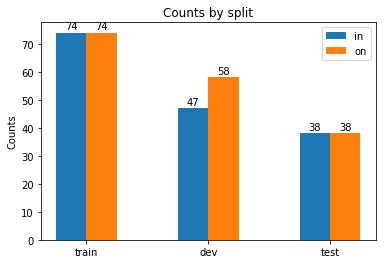

In [9]:
ind = np.array([1,2,3])
folds = ('train', 'dev', 'test')
fig, ax = plt.subplots()

in_data = {"train": 0, "dev": 0, "test": 0}
for key in in_data:
    for x,y in zip(labels['folds'][key]['in']['ob1'], labels['folds'][key]['in']['ob2']):
        in_data[key] += 1 if pair_to_names(x,y) in data else 0
l_in = ax.bar([1,2,3], [in_data[key] for key in folds], 0.25)

on_data = {"train": 0, "dev": 0, "test": 0}
for key in in_data:
    for x,y in zip(labels['folds'][key]['on']['ob1'], labels['folds'][key]['on']['ob2']):
        on_data[key] += 1 if pair_to_names(x,y) in data else 0        
l_on = ax.bar([1.25,2.25,3.25], [on_data[key] for key in folds], 0.25)

ax.legend((l_in[0], l_on[0]), ("in", "on"))
ax.set_ylabel('Counts')
ax.set_title('Counts by split')
ax.set_xticks(ind + 0.25 / 2)
ax.set_xticklabels(folds)
autolabel(l_in)
autolabel(l_on)
plt.show()

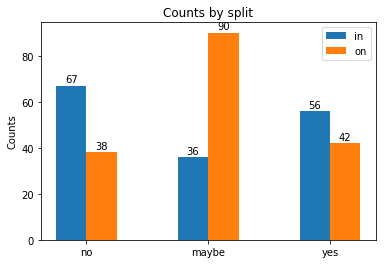

In [10]:
width = 0.25
values = ('no', 'maybe', 'yes')
ind = np.arange(len(values))
fig, ax = plt.subplots()

in_data = [0,0,0]
for key in ['train','dev','test']:
    for x,y,l in zip(labels['folds'][key]['in']['ob1'], 
                     labels['folds'][key]['in']['ob2'], 
                     labels['folds'][key]['in']['label']):
        if pair_to_names(x,y) in data:
            in_data[l] += 1
l_in = ax.bar(ind, in_data, width)

on_data = [0,0,0]
for key in ['train','dev','test']:
    for x,y,l in zip(labels['folds'][key]['on']['ob1'], 
                   labels['folds'][key]['on']['ob2'],
                   labels['folds'][key]['on']['label']):
        if pair_to_names(x,y) in data:
            on_data[l] += 1
l_on = ax.bar(ind + width, on_data, width)

ax.legend((l_in[0], l_on[0]), ("in", "on"))
ax.set_ylabel('Counts')
ax.set_title('Counts by split')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(values)
autolabel(l_in)
autolabel(l_on)
plt.show()

(053_mini_soccer, 003_cracker_box)


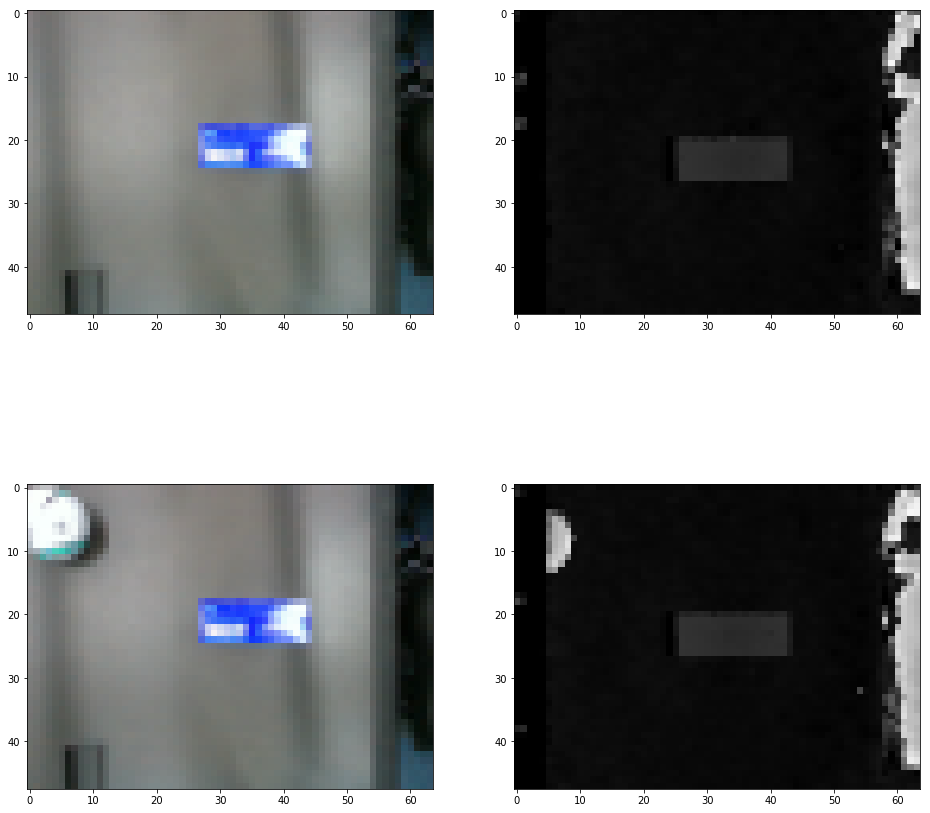

In [19]:
key = list(data.keys())[35]
trial = str(1)

print(key)
fig = plt.figure(figsize=(16,16))
fig.add_subplot(2,2,1)
_ = plt.imshow(np.array(data[key][trial]['t0_rgbmap']).transpose([1,2,0])/255)
fig.add_subplot(2,2,2)
_ = plt.imshow(np.tile(np.array(data[key][trial]['t0_depthmap']).reshape((48, 64, 1)), (1,1,3))/255)
fig.add_subplot(2,2,3)
_ = plt.imshow(np.array(data[key][trial]['t1_rgbmap']).transpose([1,2,0])/255)
fig.add_subplot(2,2,4)
_ = plt.imshow(np.tile(np.array(data[key][trial]['t1_depthmap']).reshape((48, 64, 1)), (1,1,3))/255)
plt.show()